In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

In [ ]:
data

In [ ]:
data.head(10)

In [ ]:
data.tail(10)

In [ ]:
data.dtypes

In [3]:
data.to_excel("titanic.xlsx", sheet_name="passengers", index=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
ages = data["age"]

In [6]:
ages.head(10)

0    29.00
1     0.92
2     2.00
3    30.00
4    25.00
5    48.00
6    63.00
7    39.00
8    53.00
9    71.00
Name: age, dtype: float64

In [7]:
ages.max()

80.0

In [8]:
ages.min()

0.17

In [9]:
age_sex = data[["age", "sex"]]

In [11]:
age_sex.shape

(1309, 2)

In [12]:
age_sex

,age,sex
0,29.00,female
1,0.92,male
2,2.00,female
3,30.00,male
4,25.00,female
...,...,...
1304,14.50,female
1305,NaN,female
1306,26.50,male
1307,27.00,male


In [16]:
over_35 = data[data["age"] >= 35]
over_35.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN"
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"


In [14]:
over_35.shape

(322, 14)

In [17]:
class_23 = data[data["pclass"].isin([2, 3])]
class_23.shape

(986, 14)

## These do the same thing the second one uses an "or" statement

In [18]:
class_23 = data[(data["pclass"] == 2) | (data["pclass"] == 3)]
class_23.shape

(986, 14)

In [20]:
age_known = data[data["name"].notna()]
age_known.shape

(1309, 14)

## Commands to clean up some of the data

In [ ]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare":np.float64})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [ ]:
data.replace({'male': 1, 'female': 0}, inplace=True)

# More Titanic Analysis

In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

data = pd.read_csv('titanic3.csv')

In [2]:
data.shape

(1309, 14)

In [3]:
datadict = pd.DataFrame(data.dtypes)
datadict

,0
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [4]:
datadict['MissingVal'] = data.isnull().sum()
datadict

,0,MissingVal
pclass,int64,0
survived,int64,0
name,object,0
sex,object,0
age,float64,263
sibsp,int64,0
parch,int64,0
ticket,object,0
fare,float64,1
cabin,object,1014


<AxesSubplot:>

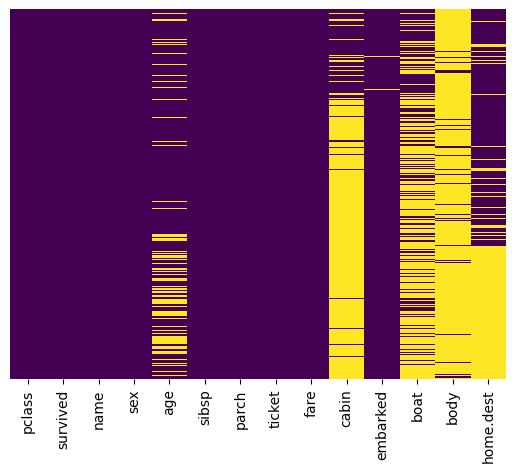

In [5]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [6]:
datadict['NUnique'] = data.nunique()
datadict

,0,MissingVal,NUnique
pclass,int64,0,3
survived,int64,0,2
name,object,0,1307
sex,object,0,2
age,float64,263,98
sibsp,int64,0,7
parch,int64,0,8
ticket,object,0,929
fare,float64,1,281
cabin,object,1014,186


In [7]:
data[data["fare"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


In [8]:
datadict['Count'] = data.count()
datadict

,0,MissingVal,NUnique,Count
pclass,int64,0,3,1309
survived,int64,0,2,1309
name,object,0,1307,1309
sex,object,0,2,1309
age,float64,263,98,1046
sibsp,int64,0,7,1309
parch,int64,0,8,1309
ticket,object,0,929,1309
fare,float64,1,281,1308
cabin,object,1014,186,295


In [9]:
data.survived.value_counts(normalize=True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

<AxesSubplot:xlabel='survived', ylabel='count'>

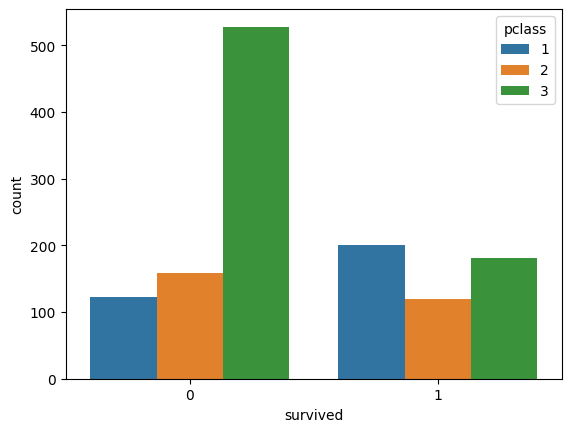

In [10]:
sns.countplot(x='survived', hue='pclass', data=data)

<AxesSubplot:xlabel='sex', ylabel='age'>

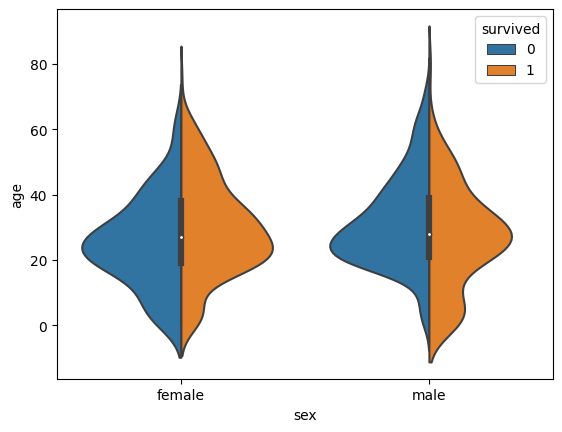

In [11]:
sns.violinplot(x='sex',y='age',hue='survived',data=data,split=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

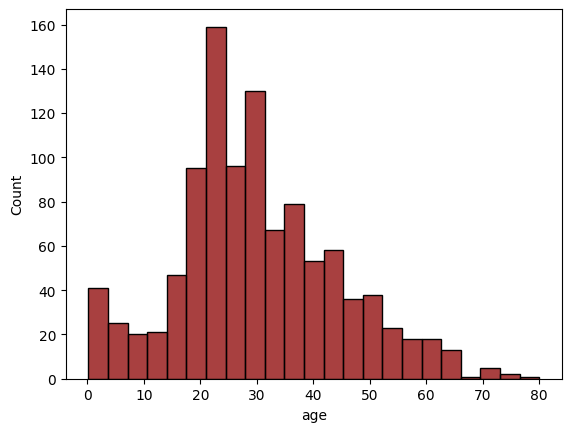

In [12]:
sns.histplot(data['age'].dropna(), kde=False,color='darkred')

<AxesSubplot:xlabel='sibsp', ylabel='count'>

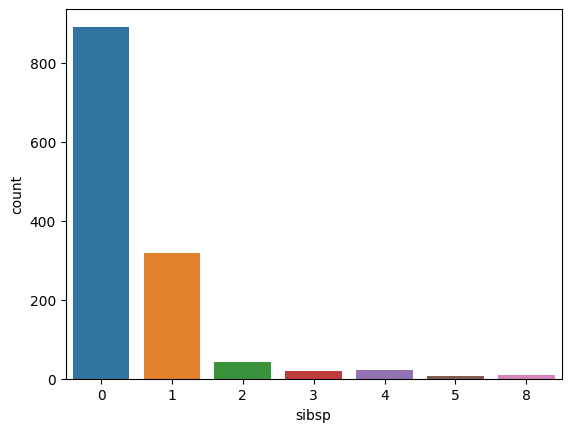

In [13]:
sns.countplot(x='sibsp', data=data)